Installing and loading all the required libraries for the task of data loading, visualization, manipulation, machine learning, sentimental analysis and creating the interative dashboard.

In [ ]:
#!pip install dash

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import sqlite3

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
from io import BytesIO
import base64

/var/folders/yt/cw9tyxd951ncqs90yp_bnmg00000gn/T/ipykernel_14081/135065280.py:35: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/yt/cw9tyxd951ncqs90yp_bnmg00000gn/T/ipykernel_14081/135065280.py:36: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


loading the first data which is in csv format and having a glimpse of the data.

In [2]:
df = pd.read_csv('TAM07.20231217131259.csv')
df.head()

,STATISTIC,Statistic Label,TLIST(M1),Month,C02935V03550,Airports in Ireland,C02191V04000,Country,C02354V02832,Direction,C02936V03551,Flight Type,UNIT,VALUE
0,TAM07C01,Passengers,202001,2020 January,EI0M,All main airports,-,All Countries,-,All directions,-,All flights,Thousand,2388.4
1,TAM07C01,Passengers,202001,2020 January,EI0M,All main airports,-,All Countries,-,All directions,1,Scheduled,Thousand,2365.5
2,TAM07C01,Passengers,202001,2020 January,EI0M,All main airports,-,All Countries,-,All directions,2,Unscheduled,Thousand,22.8
3,TAM07C01,Passengers,202001,2020 January,EI0M,All main airports,-,All Countries,3,Arrival,-,All flights,Thousand,1200.0
4,TAM07C01,Passengers,202001,2020 January,EI0M,All main airports,-,All Countries,3,Arrival,1,Scheduled,Thousand,1187.7


Checking the info of the data, like data types, count and its shape.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430110 entries, 0 to 430109
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   STATISTIC            430110 non-null  object 
 1   Statistic Label      430110 non-null  object 
 2   TLIST(M1)            430110 non-null  int64  
 3   Month                430110 non-null  object 
 4   C02935V03550         430110 non-null  object 
 5   Airports in Ireland  430110 non-null  object 
 6   C02191V04000         430110 non-null  object 
 7   Country              430110 non-null  object 
 8   C02354V02832         430110 non-null  object 
 9   Direction            430110 non-null  object 
 10  C02936V03551         430110 non-null  object 
 11  Flight Type          430110 non-null  object 
 12  UNIT                 430110 non-null  object 
 13  VALUE                430110 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 45.9+ MB


In [4]:
df.shape

(430110, 14)

checking the unique countries in the dataset

In [5]:
#finding the countries in our dataset
df.Country.unique()

array(['All Countries', 'Ireland (domestic)', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Canary Islands', 'Sweden', 'EU27 excl Ireland 2020',
       'United Kingdom (1)', 'England', 'Northern Ireland', 'Scotland',
       'Wales', 'Other UK (1)', 'Iceland', 'Norway', 'Russia', 'Serbia',
       'Switzerland', 'Turkiye', 'Other Europe (3)',
       'Europe (48 Countries)', 'America', 'Canada', 'United States',
       'Other America (5)', 'Africa (9)', 'Eygpt', 'Morocco', 'Tunisia',
       'Other Africa (6)', 'Asia (8)', 'Bahrain', 'Israel',
       'United Arab Emirates', 'Other Asian countries (4)',
       'Oceania and Polar regions (1)'], dtype=object)

- Since the data has several countries, we need to select only a few countries that we will compare with Ireland.
- Subsetting the data by selecting Ireland and countries that have a population proportion to it which are Denmark, Finland and Slovakia.

In [6]:
# filtering to get countries with proportinal population to Ireland
selected_countries = ['Ireland (domestic)', 'Denmark', 'Finland', 'Slovakia']

# Filter rows where the 'Country' column is in the list of selected countries
df_selected = df[df['Country'].isin(selected_countries)]

# renaming Ireland
df_selected.loc[df_selected['Country'] == 'Ireland (domestic)', 'Country'] = 'Ireland'

It can be noted we have the selected countries and our data and shape of the data has changed.

In [7]:
df_selected.Country.unique()

array(['Ireland', 'Denmark', 'Finland', 'Slovakia'], dtype=object)

In [8]:
df_selected.shape

(29160, 14)

- Filtering the data to remain with columns that will be needed for analysis.
- 8 columns are kept these will be needed for analysis.

In [9]:
# keeping required columns
selected_columns = ['Statistic Label', 'Month', 'Airports in Ireland', 'Country', 'Direction', 'Flight Type', 'UNIT', 'VALUE']

# Create a new DataFrame with the selected columns
df_selected = df_selected[selected_columns]

# Replace spaces with underscores in column names
df_selected.columns = df_selected.columns.str.replace(' ', '_')

In [10]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29160 entries, 9 to 429803
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic_Label      29160 non-null  object 
 1   Month                29160 non-null  object 
 2   Airports_in_Ireland  29160 non-null  object 
 3   Country              29160 non-null  object 
 4   Direction            29160 non-null  object 
 5   Flight_Type          29160 non-null  object 
 6   UNIT                 29160 non-null  object 
 7   VALUE                29160 non-null  float64
dtypes: float64(1), object(7)
memory usage: 2.0+ MB


Creating a new column from the month column by splitting the month column. The new year column will be needed for easy vizualization during the explanatory data analysis.

In [11]:
# creating year column by splitting the month column
df_selected[['Year', 'Month']] = df_selected['Month'].str.split(expand=True)

In [12]:
df_selected.head()

,Statistic_Label,Month,Airports_in_Ireland,Country,Direction,Flight_Type,UNIT,VALUE,Year
9,Passengers,January,All main airports,Ireland,All directions,All flights,Thousand,9.7,2020
10,Passengers,January,All main airports,Ireland,All directions,Scheduled,Thousand,9.7,2020
11,Passengers,January,All main airports,Ireland,All directions,Unscheduled,Thousand,0.0,2020
12,Passengers,January,All main airports,Ireland,Arrival,All flights,Thousand,5.1,2020
13,Passengers,January,All main airports,Ireland,Arrival,Scheduled,Thousand,5.0,2020


**Explanatory Data Analysis(EDA)**

How distribution varies in Ireland in terms of statistic label?
- A boxplot is used for plotting each statistic label.Why? It easily shows us the central measures of tendency like the mean, the interquartile range, the quartilesn and outliers.
- The statistic label column is therefore plotted for Ireland data to to help answer this question.

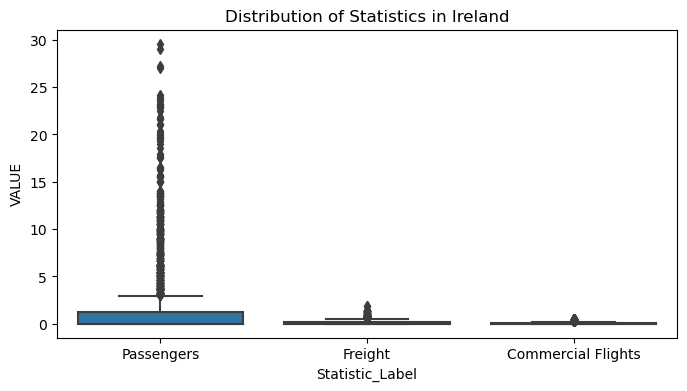

In [13]:
# Filter the data for Ireland
df_ireland = df_selected[df_selected['Country'] == 'Ireland']
# Plot the distribution of 'VALUE' for each 'Statistic_Label'
plt.figure(figsize=(8,4))
sns.boxplot(x='Statistic_Label', y='VALUE', data=df_ireland)
plt.title('Distribution of Statistics in Ireland')
plt.show()

The passengers tend to have the highest mean, Interquartile range and extreme outliers when compared to other statistic labels.
The Freigth label comes at the second place with commercial fligths being the least in terms of mean, IQR and outliers.

For each aiport in Ireland excluding main ports what is the trend over the years?
- Trend is better shown by time series plot and using a lineplot achieves this perfectly. It clealry shows how our data is varying from time to time.
- This is a time series plot, it spans over the years plotting the Ireland data. Main ports are removed to remain with the ports in Ireland.

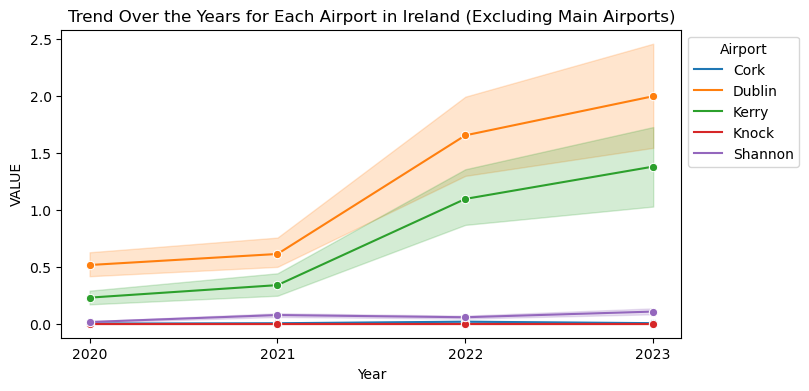

In [14]:
# Filter the data for Ireland and exclude main airports
df_airports_ireland = df_ireland[df_ireland['Airports_in_Ireland'] != 'All main airports']
# Create a line plot for each airport
plt.figure(figsize=(8,4))
sns.lineplot(x='Year', y='VALUE', hue='Airports_in_Ireland', data=df_airports_ireland, marker='o')
plt.title('Trend Over the Years for Each Airport in Ireland (Excluding Main Airports)')
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.legend(title='Airport', bbox_to_anchor=(1, 1))
plt.show()

- From the plot almost all Airports are having a rising trend from 2020 to 2023.
- Dublin is the top Airport in Ireland across the years, followed by Kerry. These two are showing a clear trend over the years.
- Knock, Shanon and Cork are at the bottom. There is a clear trend with Shanon but the other two are almost not trending.

Over the years which month in Ireland are Airports doing great or worse?
- A barplot generally helps to highlight the difference between two or more data points. Since we are concerned with how each month is coimparing to the other barplots will make this distribution easy
- The data from the selected countires is grouped by month, then for each month the average value is calculated for each month. Then the values for all of the months are arranged from the greatest to the smallest.
- This investigates the distribution of Airtraffic over the months in the year for the whole of Ireland.

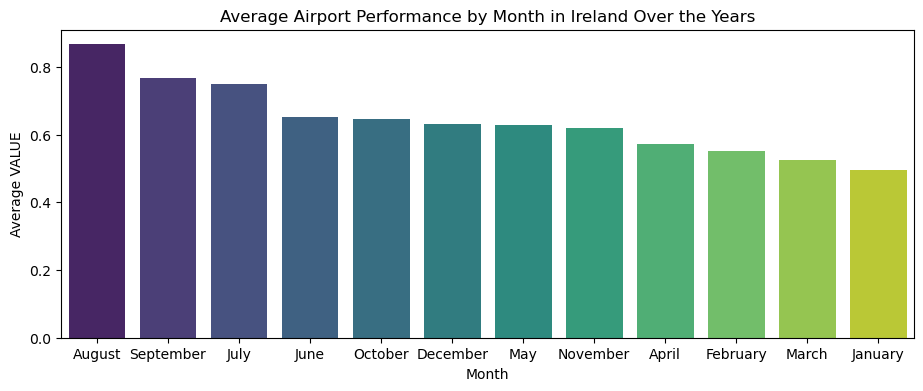

In [22]:
# Group by Month and calculate the mean 'VALUE' for each month
monthly_stats = df_ireland.groupby('Month')['VALUE'].mean().sort_values(ascending=False)
# Create a bar plot for average 'VALUE' by month with months arranged from best to worst
plt.figure(figsize=(11,4))
sns.barplot(x=monthly_stats.index, y=monthly_stats.values, order=monthly_stats.index, palette='viridis')
plt.title('Average Airport Performance by Month in Ireland Over the Years')
plt.xlabel('Month')
plt.ylabel('Average VALUE')
plt.show()

From the plot it can be noted that the 3rd quarter months are leading to higher performance. The first quarter months are leading to lower performance as it can be noted. August is the best month sligthly higher than September while January is the lowest sligthly lower than March and February.

How is the performance among the countries?
- Again since we are focussed on how each country's comparison with another a barplot easily accomplishes that.
- For each country the mean is calculated and then the values arranged from the greatest to the smallest.

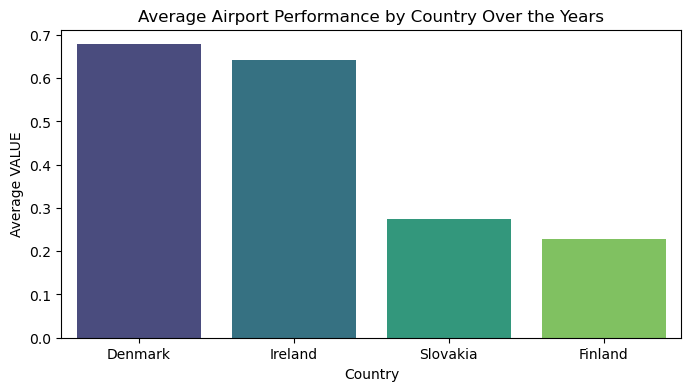

In [23]:
# Group by Country and calculate the mean 'VALUE' for each country
country_stats = df_selected.groupby('Country')['VALUE'].mean().sort_values(ascending=False)
# Create a bar plot for average 'VALUE' by country
plt.figure(figsize=(8,4))
sns.barplot(x=country_stats.index, y=country_stats.values, order=country_stats.index, palette='viridis')
plt.title('Average Airport Performance by Country Over the Years')
plt.xlabel('Country')
plt.ylabel('Average VALUE')
plt.show()

Denmark is producing the best value performance when compared to the other countires but this value is sligtly greater than Ireland's value. Slovakia and Finland are the lowest when compared to the top two countries.

How are the statistics comparing for each country?
- A boxplot can be used here instead of a barplot if other additional statistics are required. But the barplot makes the visualization simple and acieves to answer required.
- The statistics mean value per statistic label is plotted for each of the countries in the dataset.

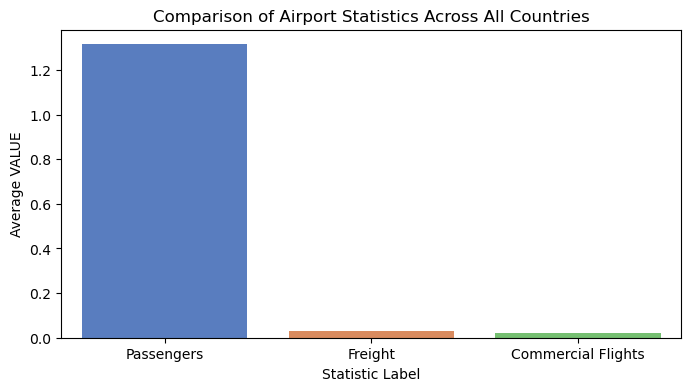

In [24]:
# Group by Statistic_Label and calculate the mean 'VALUE' for each label
label_stats = df_selected.groupby('Statistic_Label')['VALUE'].mean().sort_values(ascending=False)

# Create a bar plot for average 'VALUE' by Statistic_Label across all countries
plt.figure(figsize=(8,4))
sns.barplot(x=label_stats.index, y=label_stats.values, palette='muted')
plt.title('Comparison of Airport Statistics Across All Countries')
plt.xlabel('Statistic Label')
plt.ylabel('Average VALUE')
plt.show()

Passengers statistic label is greatest among the 4 countries, it is similar as it was noted also in Ireland. The statistics are similar as observed in Ireland with freigth being sligthly higher than commercial fligths.

For each country what is the trend over the years?

- A lineplot is used as it easily shows the varying of data with time.
- For each country in each year, the value is visualized and compared against other countries.

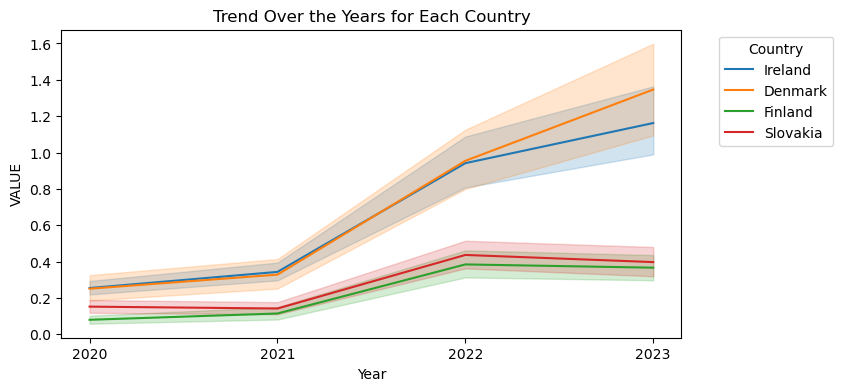

In [25]:
# Filter the data for each country
countries = df_selected['Country'].unique()

# Create a line plot for each country
plt.figure(figsize=(8, 4))

for country in countries:
    df_country = df_selected[df_selected['Country'] == country]
    sns.lineplot(x='Year', y='VALUE', data=df_country, label=country)

plt.title('Trend Over the Years for Each Country')
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Across all the countries we have a rising trend over the years. Ireland and Denmark have the greatest value over the years close to each other. But as we move from 2022 to 2023 Denmark has a sligthly greater increase than that in Ireland.

How are flight types comparing across all the countries?
- Since the fligth type column has more than two categories using a stacked bar chart produces an easy visulization.
- The plot focuses on comparing flight types per each country.

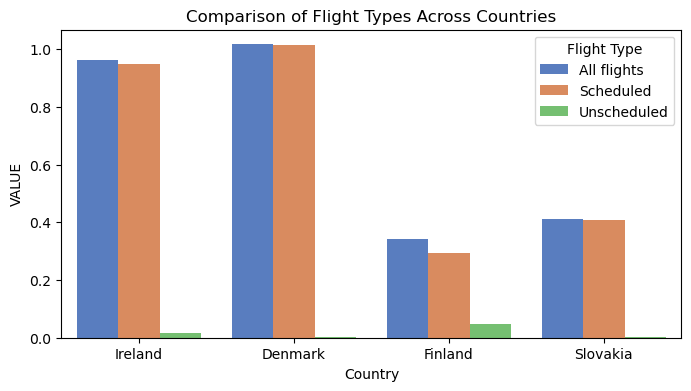

In [26]:
# Create a bar plot for 'VALUE' by 'Flight_Type' for each country without error bars
plt.figure(figsize=(8, 4))
sns.barplot(x='Country', y='VALUE', hue='Flight_Type', data=df_selected, errorbar=None, palette='muted')
plt.title('Comparison of Flight Types Across Countries')
plt.xlabel('Country')
plt.ylabel('VALUE')
plt.legend(title='Flight Type')
plt.show()

From all the countries it can be noted that the number of unscheduled fligths are less.
Unscheduled fligths are highest in Finland followed by Ireland with both Denmark and Slovakia recording lower cases.

Checking for nulls and duplicates in the dataframe to ensure the data is clean and free of any inconsitencies.

In [28]:
# Check for null values
print("Null values in the DataFrame:")
print(df_selected.isnull().sum())

Null values in the DataFrame:
Statistic_Label        0
Month                  0
Airports_in_Ireland    0
Country                0
Direction              0
Flight_Type            0
UNIT                   0
VALUE                  0
Year                   0
dtype: int64


In [29]:
# Check for duplicates
print("\nDuplicates in the DataFrame:")
print(df_selected.duplicated().sum())


Duplicates in the DataFrame:
0


There are no nulls or duplicates in the data set.

Statistics for Data Analytics Tasks
For this part we will focus on testing for several hypothesis.
So, we have the null and alternative hypothesis which will be tested.

1. T-test for comparing means between two groups
- The two are Scheduled and unscheduled.

- Null Hypothesis (H0): There is no significant difference in the mean values of 'VALUE' between 'Scheduled' and 'Unscheduled' flights.

- Alternative Hypothesis (H1): There is a significant difference in the mean values of 'VALUE' between 'Scheduled' and 'Unscheduled' flights.

In [30]:
# Let's compare the mean values of 'VALUE' for 'Scheduled' and 'Unscheduled' flights.
scheduled_values = df_selected[df_selected['Flight_Type'] == 'Scheduled']['VALUE']
unscheduled_values = df_selected[df_selected['Flight_Type'] == 'Unscheduled']['VALUE']

t_stat, p_value = stats.ttest_ind(scheduled_values, unscheduled_values)

print(f'T-test results: T-statistic = {t_stat}, p-value = {p_value}')

T-test results: T-statistic = 24.187320137011557, p-value = 2.2981116539205896e-127


The t-test results indicate a statistically significant difference between the mean values of 'VALUE' for 'Scheduled' and 'Unscheduled' flights. The p-value is very close to zero (2.2981116539205896e-127), which is below the commonly used significance level of 0.05.

With such a low p-value, you can reject the null hypothesis that there is no difference in the mean values of 'VALUE' between 'Scheduled' and 'Unscheduled' flights. Therefore, you have evidence to suggest that there is a significant difference in the average 'VALUE' for these two types of flights.

In practical terms, this means that there is strong evidence that the mean 'VALUE' is different for 'Scheduled' and 'Unscheduled' flights in your data.

2. ANOVA for comparing means among multiple groups
- Null Hypothesis (H0): There is no significant difference in the mean values of 'VALUE' across different `Airports_in_Ireland`.

- Alternative Hypothesis (H1): There is a significant difference in the mean values of 'VALUE' across different `Airports_in_Ireland`.

In [31]:
# Let's compare the mean values of 'VALUE' across different 'Airports_in_Ireland'.
airports = df_ireland['Airports_in_Ireland'].unique()
grouped_data = [df_ireland[df_ireland['Airports_in_Ireland'] == airport]['VALUE'] for airport in airports]

f_stat, p_value = f_oneway(*grouped_data)

print(f'ANOVA results: F-statistic = {f_stat}, p-value = {p_value}')

ANOVA results: F-statistic = 147.60702169911534, p-value = 1.0303840500953543e-149


The ANOVA results indicate a statistically significant difference in the mean values of 'VALUE' across different 'Airports_in_Ireland.' The F-statistic is 147.60702169911534, and the p-value is very close to zero (1.0303840500953543e-149), which is well below the commonly used significance level of 0.05.

The low p-value suggests that there is strong evidence to reject the null hypothesis, indicating that at least one of the means of 'VALUE' across the different airports is different. In other words, there are significant differences in the average 'VALUE' among the various airports in Ireland.

3. Chi-squared test for independence between categorical variables

- Null Hypothesis (H0): There is no association between `Flight_Type` and `Direction`. In other words, the variables are independent of each other.

- Alternative Hypothesis (H1): There is a significant association between `Flight_Type` and `Direction`. In other words, the variables are dependent or associated with each other.

In [32]:
# checking if there is an association between 'Flight_Type' and 'Direction'.
contingency_table = pd.crosstab(df_selected['Flight_Type'], df_selected['Direction'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-squared test results: Chi2-statistic = {chi2_stat}, p-value = {p_value}')

Chi-squared test results: Chi2-statistic = 0.0, p-value = 1.0


The chi-squared test results indicate that there is no significant association between 'Flight_Type' and 'Direction' in your data. The chi2-statistic is 0.0, and the p-value is 1.0. A p-value of 1.0 suggests that there is no evidence to reject the null hypothesis, which in this case would be the hypothesis that there is no association between 'Flight_Type' and 'Direction.'

4. Mann-Whitney U test for comparing distributions
- Null Hypothesis (H0): There is no significant difference in the distributions of 'VALUE' between `Ireland` and `Denmark`.

- Alternative Hypothesis (H1): There is a significant difference in the distributions of 'VALUE' between `Ireland` and `Denmark`.

In [33]:
# comparing the distributions of 'VALUE' between 'Ireland' and 'Denmark'.
ireland_values = df_selected[df_selected['Country'] == 'Ireland']['VALUE']
denmark_values = df_selected[df_selected['Country'] == 'Denmark']['VALUE']

u_stat, p_value = mannwhitneyu(ireland_values, denmark_values)

print(f'Mann-Whitney U test results: U-statistic = {u_stat}, p-value = {p_value}')

Mann-Whitney U test results: U-statistic = 32492343.0, p-value = 2.405576424781503e-218


The Mann-Whitney U test results indicate a statistically significant difference in the distributions of 'VALUE' between 'Ireland' and 'Denmark.' The U-statistic is 32492343.0, and the p-value is very close to zero (2.405576424781503e-218), which is well below the commonly used significance level of 0.05.

With such a low p-value, you can reject the null hypothesis that there is no difference in the distributions of 'VALUE' between 'Ireland' and 'Denmark.' Therefore, you have evidence to suggest that there is a significant difference in the distribution of 'VALUE' between these two countries in your data.

5. Correlation between two numeric variables
- Null Hypothesis (H0): There is no correlation between 'VALUE' and 'Year' (correlation coefficient equals 0).

- Alternative Hypothesis (H1): There is a significant correlation between 'VALUE' and 'Year' (correlation coefficient is not equal to 0).

In [34]:
#  checking the correlation between 'VALUE' and another numeric variable, say 'Year'.
correlation_coefficient, p_value = stats.pearsonr(df_selected['VALUE'], pd.to_numeric(df_selected['Year']))

print(f'Correlation results: Correlation coefficient = {correlation_coefficient}, p-value = {p_value}')

Correlation results: Correlation coefficient = 0.11636968455528468, p-value = 1.884329250182419e-88


The correlation results indicate a statistically significant but relatively weak positive correlation between 'VALUE' and 'Year.' The correlation coefficient is 0.11636968455525232, and the p-value is very close to zero (1.8843292503932015e-88), which is well below the commonly used significance level of 0.05.

The positive correlation coefficient suggests that as the 'Year' increases, there is a slight increase in the 'VALUE' variable. However, the strength of the correlation is considered weak based on the magnitude of the correlation coefficient.

6. Wilcoxon Signed-Rank Test for paired samples
- Null Hypothesis (H0): There is no significant difference in the distribution of `VALUE` between `Arrival` and `Departure` for `Scheduled` flights.

- Alternative Hypothesis (H1): There is a significant difference in the distribution of `VALUE` between `Arrival` and `Departure` for `Scheduled`  flights.

In [35]:
# comparing the 'VALUE' between 'Arrival' and 'Departure' for 'Scheduled' flights.
scheduled = df_selected[df_selected['Flight_Type'] == 'Scheduled']
arrival = scheduled[scheduled['Direction'] == 'Arrival']['VALUE']
departure = scheduled[scheduled['Direction'] == 'Departure']['VALUE']

w_stat, p_value = wilcoxon(arrival, departure)

print(f'Wilcoxon Signed-Rank Test results: W-statistic = {w_stat}, p-value = {p_value}')

Wilcoxon Signed-Rank Test results: W-statistic = 32215.5, p-value = 6.810558894481764e-09


The Wilcoxon Signed-Rank Test results indicate a statistically significant difference in the 'VALUE' between 'Arrival' and 'Departure' for 'Scheduled' flights. The W-statistic is 32215.5, and the p-value is very close to zero (6.810558894481764e-09), which is well below the commonly used significance level of 0.05.

With such a low p-value, you can reject the null hypothesis that there is no difference in the 'VALUE' between 'Arrival' and 'Departure' for 'Scheduled' flights. Therefore, you have evidence to suggest that there is a significant difference in the 'VALUE' between these two directions for 'Scheduled' flights in your data.

7. Kruskal-Wallis H-test for comparing distributions among multiple groups
- Null Hypothesis (H0): There is no significant difference in the distribution of `VALUE` across different months.

- Alternative Hypothesis (H1): There is a significant difference in the distribution of `VALUE` across different months.

In [36]:
# comparing the distributions of 'VALUE' across different months.
months = df_selected['Month'].unique()
grouped_data_month = [df_selected[df_selected['Month'] == month]['VALUE'] for month in months]

h_stat, p_value = kruskal(*grouped_data_month)

print(f'Kruskal-Wallis H-test results: H-statistic = {h_stat}, p-value = {p_value}')

Kruskal-Wallis H-test results: H-statistic = 57.291339564317646, p-value = 2.940465305125592e-08


The Kruskal-Wallis H-test results indicate a statistically significant difference in the distributions of 'VALUE' across different months. The H-statistic is 57.291339564317646, and the p-value is very close to zero (2.940465305125592e-08), which is well below the commonly used significance level of 0.05.

With such a low p-value, you can reject the null hypothesis that there is no difference in the distributions of 'VALUE' across different months. Therefore, you have evidence to suggest that there is a significant difference in the distribution of 'VALUE' across the months in your data.

**Machine Learning**

Creating dummy variables as machine learning models cannot work on categorical data.

In [37]:
# creating One-hot encoding categorical variables
df_selected_encoded = pd.get_dummies(df_selected, columns=['Statistic_Label','Airports_in_Ireland', 'Country', 'Direction', 'Flight_Type', 'UNIT', 'Year'])

Selecting the independent variables and the response variable.

In [38]:
# Selecting features and target variable
X = df_selected_encoded.drop(['Month', 'VALUE'], axis=1)
y = df_selected_encoded['VALUE']

- Splitting the data into 80% for train and 20% for test then building models to be used for prediction.
- The models are trained on the train data then evaluated using the test dataset by checking their mean squared error and their r_squared.

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Train KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)


# Calculate MSE and R-squared for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Calculate MSE and R-squared for Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Calculate MSE and R-squared for Decision Tree
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Calculate MSE and R-squared for KNN
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Print metrics for Random Forest
print("Random Forest Metrics:")
print(f"MSE: {rf_mse}")
print(f"R-squared: {rf_r2}")

# Print metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"MSE: {gb_mse}")
print(f"R-squared: {gb_r2}")

# Print metrics for Decision Tree
print("\nDecision Tree Metrics:")
print(f"MSE: {dt_mse}")
print(f"R-squared: {dt_r2}")

# Print metrics for KNN
print("\nKNN Metrics:")
print(f"MSE: {knn_mse}")
print(f"R-squared: {knn_r2}")

Random Forest Metrics:
MSE: 0.7081954950649257
R-squared: 0.8533980395476647

Gradient Boosting Metrics:
MSE: 2.141506065755383
R-squared: 0.5566916342336735

Decision Tree Metrics:
MSE: 0.7072901638950115
R-squared: 0.8535854501218535

KNN Metrics:
MSE: 0.7482903978052126
R-squared: 0.8450980836924911


Among the models trained, the Random Forest model has the lowest MSE and the highest R-squared, indicating better predictive performance on the test set. This suggests that, based on these metrics, the Random Forest model is the most accurate among the ones all other models used in this regression task.

**Hyperparameter tuning**

Performing hyperparameter tuning to obtain better prediction models using gridsearch method. Several parameters are set for each model then the models run on the selected parameters. The best parameter is picked for each model by picking those parameters generating less error.

In [40]:
# Define models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}


# Define parameter grids for each model
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'KNN': {'n_neighbors': list(range(3, 12, 2)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
}

# Perform GridSearchCV for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X, y)
    best_models[name] = grid_search.best_estimator_
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")

# Evaluate models using cross-validation and gather results
mse_values = []
r2_values = []

for name, model in best_models.items():
    # Cross-validation scores
    cv_mse = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

    mse_values.append(cv_mse.mean())
    r2_values.append(cv_r2.mean())

Best hyperparameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 100}
Best hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Best hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


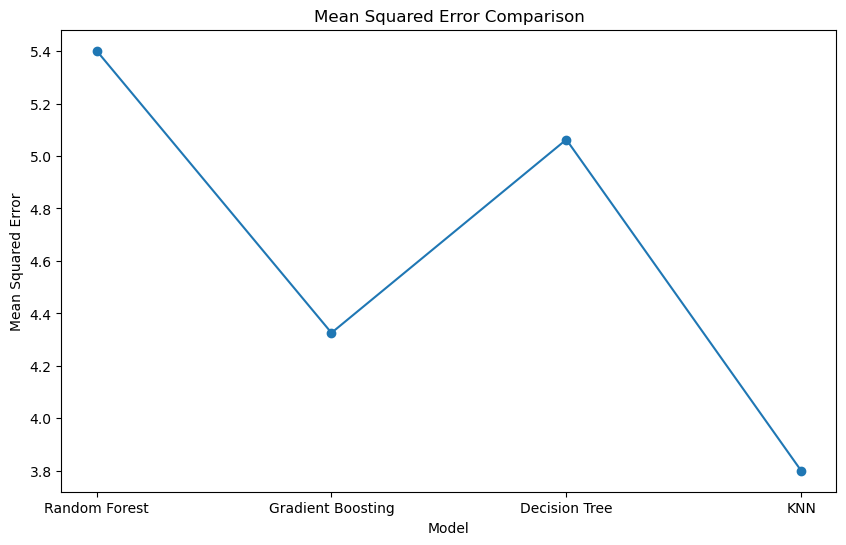

In [41]:
# Create a line plot for MSE comparison
plt.figure(figsize=(10, 6))
plt.plot(list(best_models.keys()), mse_values, marker='o', linestyle='-')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

- When the models are hypertuned with different parameters, KNN from the graph has the lowest MSE showing the best performance therefore.
- RF and Decision trees are leading to higher errors when compared to Gradient boosting and KNN model.
- Therefore the RF and DT when hypertuned they don't tend to perform better than the pother 2 models.

**Sentiment Analysis**

- loading the second dataset which is in sqlite format. A code is run to find all tables in the database. This is necessary to know which tables data is going to be pulled from.
- The data is then loadded into pandas as a normal pandas dataframe for analysis purposes on the data.

In [43]:
# Connect to the SQLite database
con = sqlite3.connect('database.sqlite')

# Create a cursor object to execute SQL queries
cursor = con.cursor()

# Execute a query to retrieve the names of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
table_names = cursor.fetchall()

# Print the table names
for table in table_names:
    print(table[0])

Tweets


pulling the data from the dataframe and loading it into pandas

In [44]:
# Load the data into a DataFrame
tweets_df = pd.read_sql_query("SELECT * FROM Tweets", con)
con.close()

In [45]:
tweets_df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,,,Delta,,JetBlueNews,,0,@JetBlue's new CEO seeks the right balance to ...,,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,,nesi_1992,,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)


In [46]:
tweets_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [47]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14485 non-null  int64  
 1   airline_sentiment             14485 non-null  object 
 2   airline_sentiment_confidence  14485 non-null  float64
 3   negativereason                14485 non-null  object 
 4   negativereason_confidence     14485 non-null  object 
 5   airline                       14485 non-null  object 
 6   airline_sentiment_gold        14485 non-null  object 
 7   name                          14485 non-null  object 
 8   negativereason_gold           14485 non-null  object 
 9   retweet_count                 14485 non-null  int64  
 10  text                          14485 non-null  object 
 11  tweet_coord                   14485 non-null  object 
 12  tweet_created                 14485 non-null  object 
 13  t

checking for any nulls from the data which may cause inconsitencies

In [48]:
# Replace blank cells with NaN in each column
tweets_df.replace('', np.nan, inplace=True)

# Check for null values in the entire DataFrame
null_values = tweets_df.isnull().sum()

# Display the null values
print("Null values in the DataFrame:")
print(null_values)

# If you want to check if there are any null values in the entire DataFrame
if tweets_df.isnull().values.any():
    print("There are null values in the DataFrame.")
else:
    print("No null values found in the DataFrame.")

Null values in the DataFrame:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5403
negativereason_confidence        4069
airline                             0
airline_sentiment_gold          14445
name                                0
negativereason_gold             14453
retweet_count                       0
text                                0
tweet_coord                     13478
tweet_created                       0
tweet_location                   4687
user_timezone                    4775
dtype: int64
There are null values in the DataFrame.


In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/feroli/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

- Picking the `text` column and `airline_sentiment` these will be used for sentiment analysis. Further nulls are dropped.
- Then we remove stopwords which are undesirable in sentimental analysis from the text. A bag of words is then create for training and prediction purposes.
- Models are then trained and their performance is evaluated.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/feroli/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Multinomial Naive Bayes Accuracy: 0.69
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score      support
negative       0.671386  0.997785  0.802673  1806.000000
neutral        0.855856  0.149371  0.254351   636.000000
positive       0.892157  0.200000  0.326750   455.000000
accuracy       0.686227  0.686227  0.686227     0.686227
macro avg      0.806466  0.449052  0.461258  2897.000000
weighted avg   0.746558  0.686227  0.607548  2897.000000



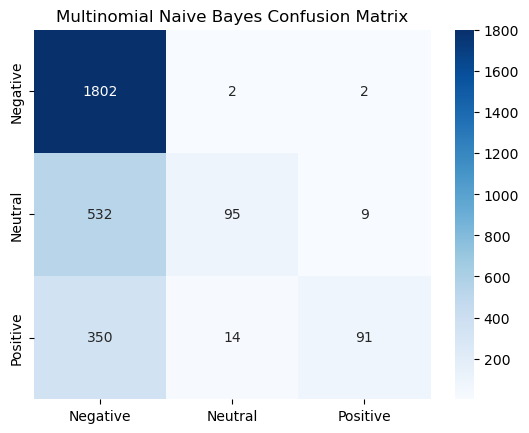



Support Vector Machine Accuracy: 0.78
Support Vector Machine Classification Report:
              precision    recall  f1-score      support
negative       0.782727  0.953488  0.859710  1806.000000
neutral        0.699732  0.410377  0.517344   636.000000
positive       0.824074  0.586813  0.685494   455.000000
accuracy       0.776666  0.776666  0.776666     0.776666
macro avg      0.768844  0.650226  0.687516  2897.000000
weighted avg   0.771001  0.776666  0.757186  2897.000000



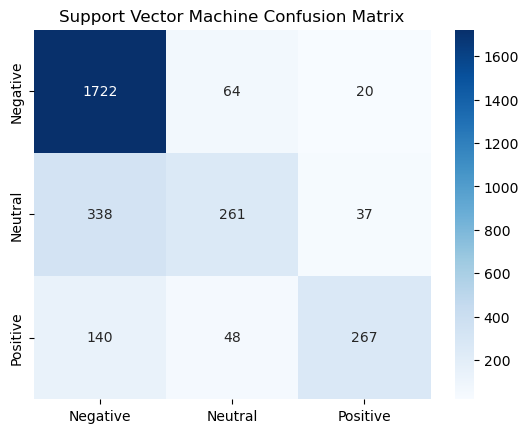



Random Forest Accuracy: 0.75
Random Forest Classification Report:
              precision    recall  f1-score      support
negative       0.767809  0.942968  0.846421  1806.000000
neutral        0.609337  0.389937  0.475551   636.000000
positive       0.794118  0.474725  0.594223   455.000000
accuracy       0.748015  0.748015  0.748015     0.748015
macro avg      0.723754  0.602543  0.638732  2897.000000
weighted avg   0.737150  0.748015  0.725392  2897.000000



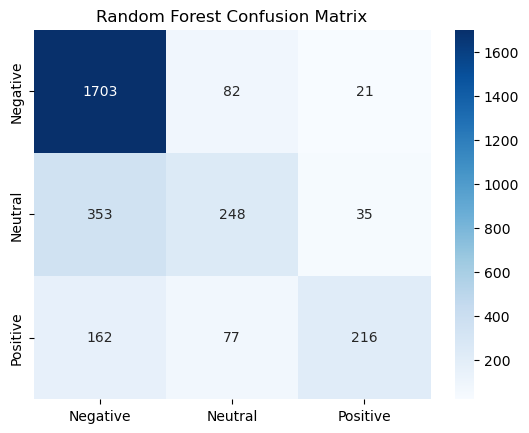



Logistic Regression Accuracy: 0.79
Logistic Regression Classification Report:
              precision    recall  f1-score      support
negative       0.803496  0.941860  0.867193  1806.000000
neutral        0.675057  0.463836  0.549860   636.000000
positive       0.819242  0.617582  0.704261   455.000000
accuracy       0.785986  0.785986  0.785986     0.785986
macro avg      0.765932  0.674426  0.707105  2897.000000
weighted avg   0.777772  0.785986  0.771937  2897.000000



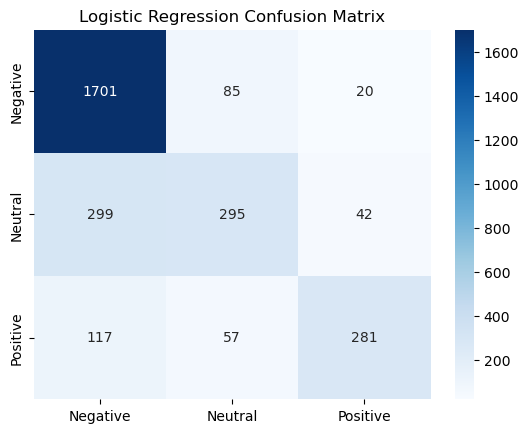

In [50]:
# Replace blank cells with NaN in the 'text' column
tweets_df['text'].replace('', np.nan, inplace=True)

# Drop rows with null values in the 'text' column
tweets_df_cleaned = tweets_df[['text', 'airline_sentiment']].dropna(subset=['text', 'airline_sentiment'])

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

tweets_df_cleaned['text'] = tweets_df_cleaned['text'].apply(preprocess_text)

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    tweets_df_cleaned['text'], tweets_df_cleaned['airline_sentiment'], test_size=0.2, random_state=13
)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Train classifiers
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)  # Increase max_iter
}

for name, classifier in classifiers.items():
    classifier.fit(train_vectors, train_labels)
    predictions = classifier.predict(test_vectors)
    accuracy = accuracy_score(test_labels, predictions)

    print(f'{name} Accuracy: {accuracy:.2f}')

    # Display classification report
    report = classification_report(test_labels, predictions, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(f'{name} Classification Report:\n{report_df}\n')

    # Display confusion matrix
    cm = confusion_matrix(test_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    print('\n' + '='*50 + '\n')

- Logistic Regression achieved the highest accuracy among the models.
- Multinomial Naive Bayes showed lower performance, especially in predicting the 'Neutral' class.
- Support Vector Machine and Random Forest had competitive performances, but SVM had a slightly higher accuracy.

In [51]:
# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div(children=[
    html.H1("Airport Statistics Dashboard"),

    html.Div([
        dcc.Graph(
            id='box-plot',
            figure=px.box(df_ireland, x='Statistic_Label', y='VALUE', title='Distribution of Statistics in Ireland')
        )
    ]),

    html.Div([
        dcc.Graph(
            id='line-plot',
            figure=px.line(df_airports_ireland, x='Year', y='VALUE', color='Airports_in_Ireland',
                           title='Trend Over the Years for Each Airport in Ireland (Excluding Main Airports)')
        )
    ]),

    html.Div([
        dcc.Graph(
            id='bar-plot-monthly',
            figure=px.bar(x=monthly_stats.index, y=monthly_stats.values,
                          title='Average Airport Performance by Month in Ireland Over the Years',
                          labels={'x': 'Month', 'y': 'Average VALUE'})
        )
    ]),

    html.Div([
        dcc.Graph(
            id='bar-plot-country',
            figure=px.bar(x=country_stats.index, y=country_stats.values,
                          title='Average Airport Performance by Country Over the Years',
                          labels={'x': 'Country', 'y': 'Average VALUE'})
        )
    ]),

    html.Div([
        dcc.Graph(
            id='bar-plot-label',
            figure=px.bar(x=label_stats.index, y=label_stats.values,
                          title='Comparison of Airport Statistics Across All Countries',
                          labels={'x': 'Statistic Label', 'y': 'Average VALUE'})
        )
    ]),

    html.Div([
        dcc.Graph(
            id='line-plot-country',
            figure=px.line(df_selected, x='Year', y='VALUE', color='Country',
                           title='Trend Over the Years for Each Country')
        )
    ]),

    html.Div([
        dcc.Graph(
            id='bar-plot-flight-type',
            figure=px.bar(df_selected, x='Country', y='VALUE', color='Flight_Type',
                          title='Comparison of Flight Types Across Countries',
                          labels={'x': 'Country', 'y': 'VALUE'},
                          barmode='group')
        )
    ]),
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
